# **결정 트리(Decision Tree)**

- 데이터를 잘 나누는 질문을 찾아 계속 추가 질문을 하여 분류 정확도를 높이는 알고리즘
- 리프 노드에서 가장 많은 클래스가 예측 클래스가 된다
- 불순도 기준을 사용해 정보 이득이 최대가 되도록 노드를 분할하고 마지막에 도달한 노드의 클래스 비율을 보고 예측
- DecisionTreeClassifier 클래스를 사용
- 노드에서 최적의 분할을 찾기 전에 특성의 순서를 섞는다
  - 약간의 무작위성이 주입될 때마다 점수가 바뀔 수 있기 때문에 random_state를 지정하지만, 실전에서는 필요하지 않다
- 노드(node) : 결정 트리를 구성하는 요소로, 훈련 데이터의 특성에 대한 테스트를 표현함.
  - 테스트의 결과(True, False)를 나타내며 일반적으로 하나의 노드는 2개의 가지를 가짐
  - 루트 노드(root node) : 맨 위의 노드
  - 리프 노드(leaf node) : 맨 아래의 노드
- 결정 트리의 장점 : **표준화 전처리 과정이 필요없음!**
- 특성 중요도 : 결정 트리는 어떤 특성이 가장 중요한지 나타내는 특성 중요도를 계산해준다(feature_importances_)
  - 모든 특성 중요도를 합하면 1이 됨
  - 특성 중요도는 특성 선택에 활용할 수 있다

## **문제 정의**

- 알코올, 도수, 당도, pH로 화이트/레드 와인 분류
- 0은 레드 와인, 1은 화이트 와인

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [7]:
# 훈련 / 테스트 세트 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [8]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [9]:
# 전처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [11]:
# 로지스틱 회귀 모델 학습
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [12]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [14]:
# 결정 트리 학습
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
# 과적합
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


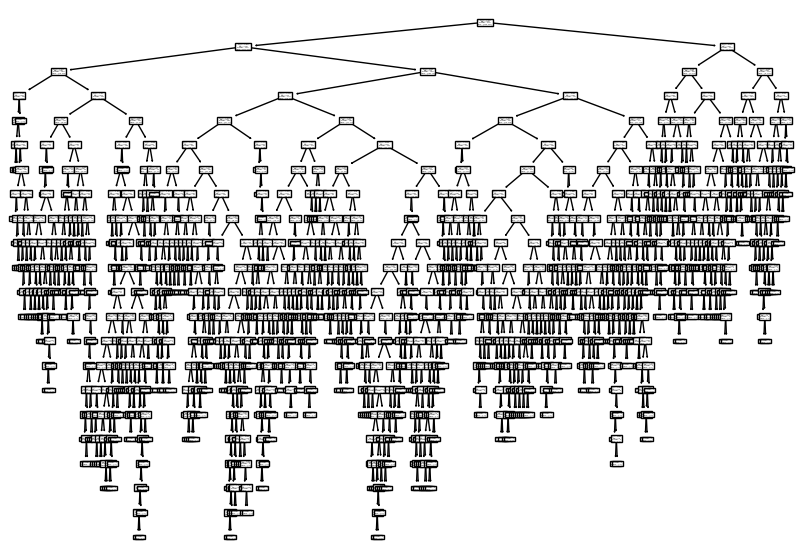

In [15]:
# plot_tree()를 이용해 결증 트리 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

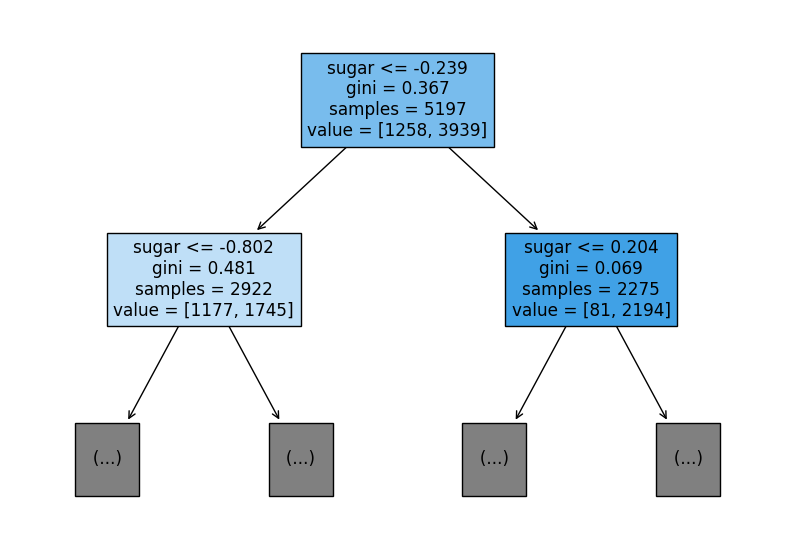

In [16]:
# max_depth로 깊이 지정, filled로 클래스에 맞게 색칠, feature_names로 특성 이름 전달
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

## **결정 트리 분석**

- 루트 노드 :
  - sugar가 -0.239 이하인지 질문. 맞으면 왼쪽, 틀리면 오른쪽
  - value : 음성 클래스(레드 와인)이 1258개, 양성 클래스(화이트 와인)이 3939개로 클래스를 나타냄
- 왼쪽 노드 :
  - sugar가 -0.802와 같거나 낮다면 왼쪽, 아니라면 오른쪽
  - 음성 클래스(레드)가 1177개, 양성 클래스(화이트)가 1745개
  - 노드의 바탕 색이 루트 노드보다 연함
- 오른쪽 노드 :
  - 음성 클래스(레드)가 81개, 양성 클래스(화이트)가 2194개
  - 노드의 바탕 색이 루트 노드보다 진함 왜? -> 어떤 클래스의 비율이 높아지면 색이 진해짐

## **지니 불순도(Gini impurity)**

- DecisionTreeClassifier의 criterion 매개변수의 기본값은 'gini'
  - criterion? -> 노드에서 데이터를 분할할 기준을 정하는 매개변수
  - entropy를 사용하면 엔트로피 불순도를 사용함(지니와 큰 차이는 없음)
- 지니 불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2)

- 어떤 노드의 두 클래스 비율이 정확이 1/2씩이라면 지니 불순도는 0.5 -> 최악
- 어떤 노드에 하나의 클래스만 있다면 지니 불순도는 0 -> 순수 노드
- 결정 트리는 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장시킴
  - 부모와 자식 노드의 불순도 차이 계산법 : 자식 노드의 불순도를 샘플 개수에 비례하여 모두 더한 후 부모 노드의 불순도에서 뺀다
  - 부모와 자식 노드 사이의 불순도 차이 = 정보 이득(information gain)
  - 노드를 순수하게 나눌수록 정보 이득이 커짐

- **즉, 결정 트리는 정보 이득이 최대가 되도록 데이터를 나누는 알고리즘!**

<br>


---

<br>

- 루트 노드의 지니 불순도 계산
  - 1 - ((1258^2 / 5197)^2 + (3939 / 5197)^2 = 0.367


In [17]:
# 가지치기 -> 가지치기를 하지 않으면 과대적합한 트리가 만들어짐
# 가지치기 방법 -> 트리의 최대 깊이를 지정하는 것
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


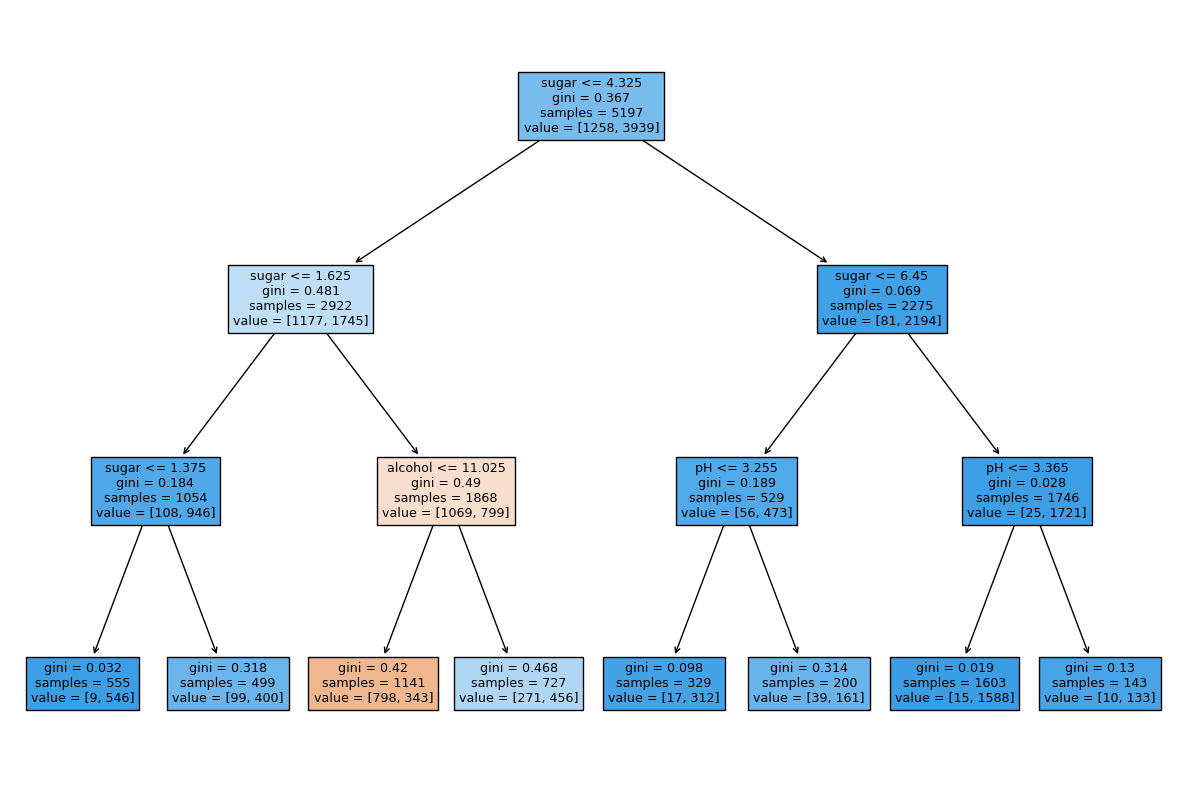

In [23]:
plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

## **결정 트리 분석2**

- 깊이 1의 노드는 모두 sugar를 기준으로 나눔
- 깊이 2의 노드는 맨 왼쪽만 sugar로 나누고, 두번째는 alcohol, 나머지는 pH로 나눔
- 깊이 3의 노드(최종 노드)는 왼쪽에서 3번째만 레드 와인으로 예측
  - 즉, 당도는 -0.802보다 크고, -0.239보다 작은 와인 중 알코올 도수가 0.454와 같거나 작은 것이 레드 와인

In [19]:
# 전처리 하기 전의 훈련 세트로 모델 학습
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
# 결과는 똑같다
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


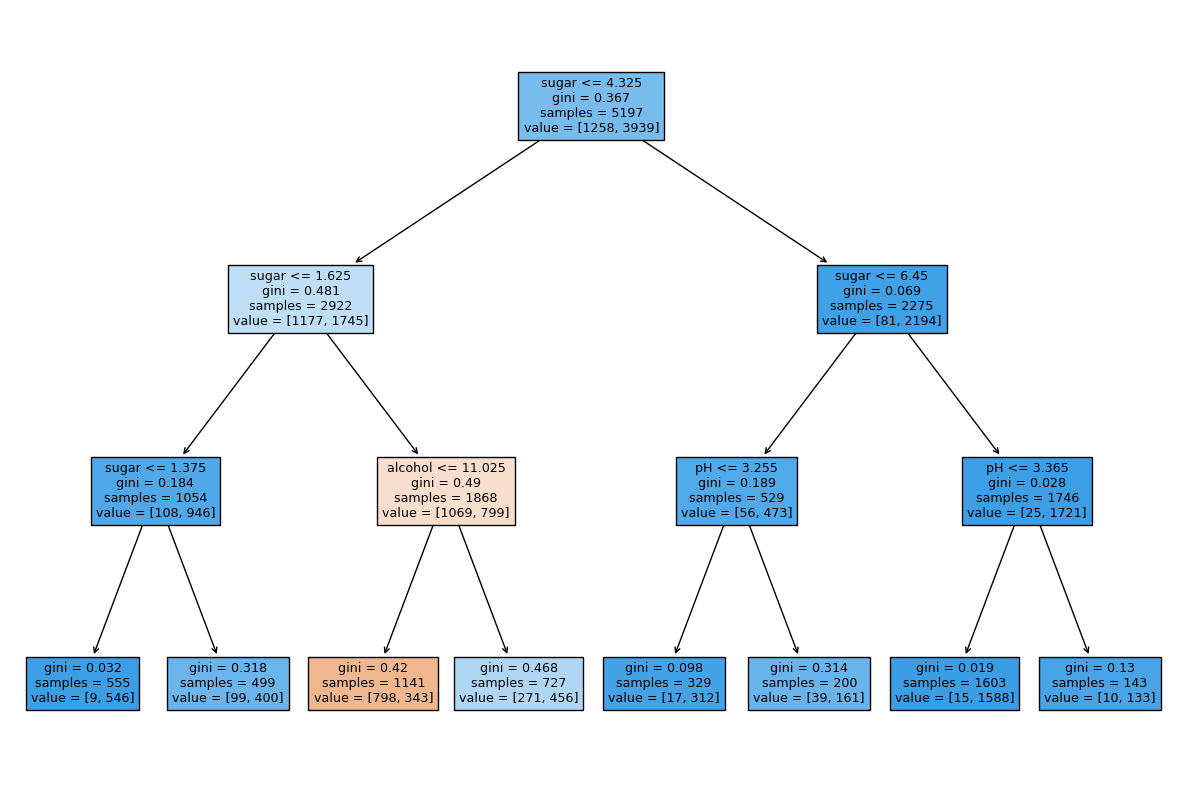

In [22]:
plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

## **결정 트리 분석3**

- 표준점수가 아닌 데이터로 시각화를 하면 더 직관적이다
- 당도가 1.625보다 크고 4.325보다 작은 와인 중 알코올 도수가 11.025와 같거나 작은 것이 레드 와인이라고 할 수 있다.

In [21]:
# 가장 중요한 특성 확인
# 두번째 값 즉, 당도가 가장 중요도가 높은 특성
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
